<a href="https://colab.research.google.com/github/HenryLiu714/ct_classification/blob/main/PrimaryModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set2_features.npy")
y = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set2_labels.npy")

X2 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set4_features.npy") # Mix images
y2 = np.load("/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set4_labels.npy")

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 9)

X_train2, X_rem2, y_train2, y_rem2 = train_test_split(X2, y2, test_size = 0.3, random_state = 17)
X_test2, X_valid2, y_test2, y_valid2 = train_test_split(X_rem2, y_rem2, test_size = 0.5, random_state = 9)

In [ ]:
Xv = np.append(X_valid, X_valid2)
yv = np.append(y_valid, y_valid2)

In [ ]:
class BuildModel:
  def layer1(model):
    model.add(Conv2D(32, (9, 9), activation='relu', input_shape=X.shape[1:]))
    model.add(AveragePooling2D(pool_size=(2, 2)))

  def convLayer(model):
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(AveragePooling2D(pool_size=(2,2)))

  def convLayer2(model):
    model.add(Conv2D(64, (5, 5), activation = 'relu'))
    model.add(AveragePooling2D(pool_size= (3,3)))

  def denseLayer(model):
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))

In [ ]:
model = Sequential()

BuildModel.layer1(model)
BuildModel.convLayer2(model)
BuildModel.convLayer(model)
BuildModel.denseLayer(model)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
training = model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data= (X_valid2, y_valid2))

Epoch 1/20
23/23 [==============================] - 5s 241ms/step - loss: 0.4810 - accuracy: 0.7531 - val_loss: 2.9306 - val_accuracy: 0.6753
Epoch 2/20
23/23 [==============================] - 3s 135ms/step - loss: 0.2622 - accuracy: 0.8563 - val_loss: 3.7975 - val_accuracy: 0.6558
Epoch 3/20
23/23 [==============================] - 3s 136ms/step - loss: 0.1595 - accuracy: 0.9331 - val_loss: 3.4725 - val_accuracy: 0.7013
Epoch 4/20
23/23 [==============================] - 3s 137ms/step - loss: 0.1001 - accuracy: 0.9554 - val_loss: 4.9426 - val_accuracy: 0.7078
Epoch 5/20
23/23 [==============================] - 3s 140ms/step - loss: 0.0789 - accuracy: 0.9693 - val_loss: 3.1506 - val_accuracy: 0.7078
Epoch 6/20
23/23 [==============================] - 3s 137ms/step - loss: 0.0346 - accuracy: 0.9847 - val_loss: 4.2291 - val_accuracy: 0.6948
Epoch 7/20
23/23 [==============================] - 3s 140ms/step - loss: 0.0347 - accuracy: 0.9874 - val_loss: 4.0225 - val_accuracy: 0.6948
Epoch 

In [ ]:
model.evaluate(X_test2, y_test2)

5/5 [==============================] - 0s 53ms/step - loss: 7.8390 - accuracy: 0.7662


[7.839040756225586, 0.7662337422370911]

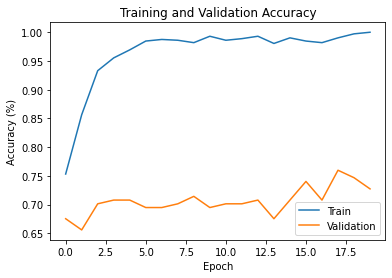

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'], loc = 'lower right')
plt.show()

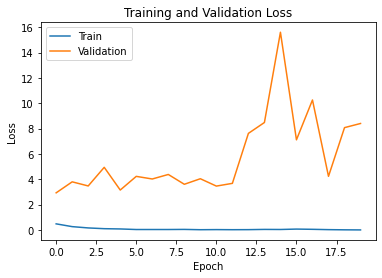

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      2624      
                                                                 
 average_pooling2d (AverageP  (None, 124, 124, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 40, 40, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 19, 19, 128)      0

In [ ]:
model.save("/content/drive/MyDrive/Stem Proyectp/Project/Models/model_3")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Stem Proyectp/Project/Models/model_3/assets
